In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('Coffee Shop Sales.xlsx', engine='openpyxl')

In [4]:
print(df.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  Unnamed: 11  \
0  Gourmet brewed coffee                

In [5]:
df.columns

Index([       'transaction_id',      'transaction_date',
            'transaction_time',       'transaction_qty',
                    'store_id',        'store_location',
                  'product_id',            'unit_price',
            'product_category',          'product_type',
              'product_detail',           'Unnamed: 11',
                 'Unnamed: 12',                      29,
       'Gourmet brewed coffee',           'Unnamed: 15',
                 'Unnamed: 16',                'Coffee'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction_id         149116 non-null  int64         
 1   transaction_date       149116 non-null  datetime64[ns]
 2   transaction_time       149116 non-null  object        
 3   transaction_qty        149116 non-null  int64         
 4   store_id               149116 non-null  int64         
 5   store_location         149116 non-null  object        
 6   product_id             149116 non-null  int64         
 7   unit_price             149116 non-null  float64       
 8   product_category       149116 non-null  object        
 9   product_type           149116 non-null  object        
 10  product_detail         149116 non-null  object        
 11  Unnamed: 11            0 non-null       float64       
 12  Unnamed: 12            0 non-null       floa

In [7]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,Unnamed: 11,Unnamed: 12,29,Unnamed: 15,Unnamed: 16
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,0.0,0.0,1.0,0.0,0.0
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,NaN,NaN,9.0,NaN,NaN
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,NaN,NaN,9.0,NaN,NaN
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,NaN,NaN,9.0,NaN,NaN
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,NaN,NaN,9.0,NaN,NaN
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,NaN,NaN,9.0,NaN,NaN
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,NaN,NaN,9.0,NaN,NaN
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

transaction_id                0
transaction_date              0
transaction_time              0
transaction_qty               0
store_id                      0
store_location                0
product_id                    0
unit_price                    0
product_category              0
product_type                  0
product_detail                0
Unnamed: 11              149116
Unnamed: 12              149116
29                       149115
Gourmet brewed coffee    149088
Unnamed: 15              149116
Unnamed: 16              149116
Coffee                   149108
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.dtypes

transaction_id                    int64
transaction_date         datetime64[ns]
transaction_time                 object
transaction_qty                   int64
store_id                          int64
store_location                   object
product_id                        int64
unit_price                      float64
product_category                 object
product_type                     object
product_detail                   object
Unnamed: 11                     float64
Unnamed: 12                     float64
29                              float64
Gourmet brewed coffee            object
Unnamed: 15                     float64
Unnamed: 16                     float64
Coffee                           object
dtype: object

## A- Sales Trend over Time

In [11]:
#Monthly Sales Trend
# Step 1: Load and prepare the data
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
# chek data type
df['transaction_date'].dtype



dtype('<M8[ns]')

In [12]:
df['sales'] = df['transaction_qty'] * df['unit_price']

In [13]:
# Step 2: Create month-sale column for monthly trend
df['month_year'] = df['transaction_date'].dt.to_period('M').astype(str)

In [14]:
# Step 3: Group by Month-Year and calculate total sales
monthly_sales = df.groupby('month_year')['sales'].sum().reset_index()

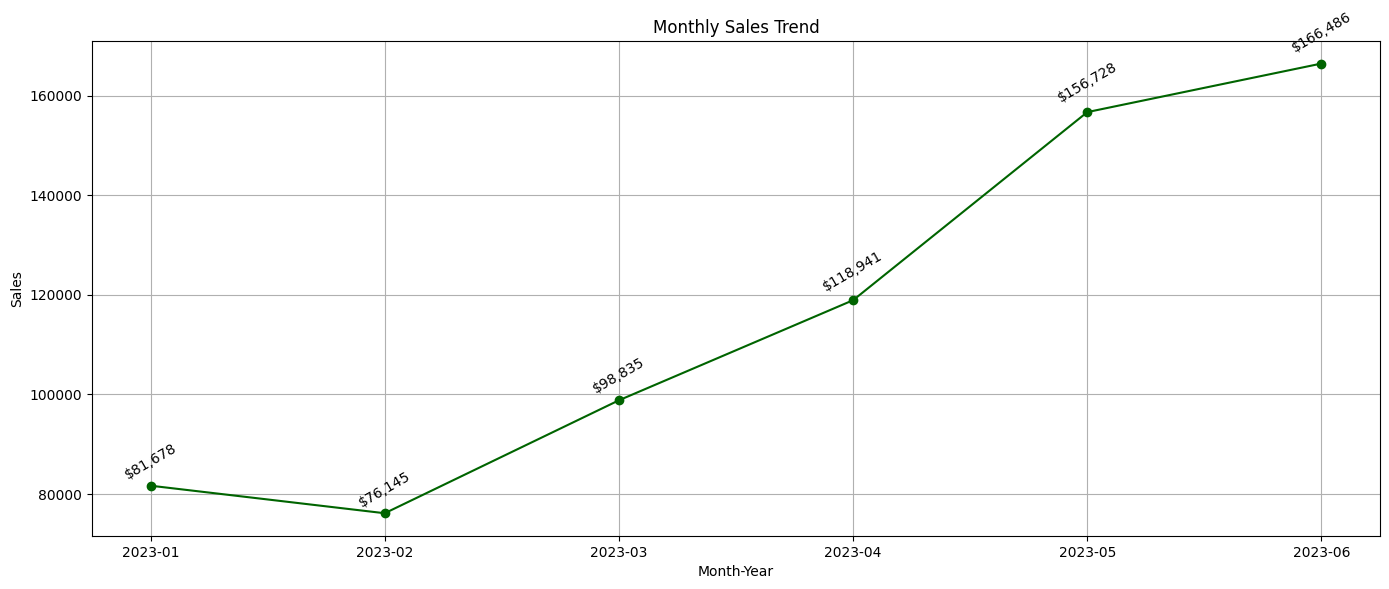

In [15]:
#Step 4: Plotting the line chart
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthly_sales['month_year'], monthly_sales['sales'], marker='o', color='darkgreen')

for i,(x,y) in enumerate(zip(monthly_sales['month_year'], monthly_sales['sales'])):
    offset=max(10,y*0.01)
    ax.annotate(
        f"${y:,.0f}",
        (x,y+offset),
        ha='center', va='bottom', fontsize=10, rotation=30
    )
ax.set_title('Monthly Sales Trend')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Sales')
plt.xticks()
ax.grid()
plt.tight_layout()
plt.show()



##### Conclusion of monthly sales trend
In January and February, sales were low, but from March onward, Sales gradually increased, extending in June to $166,486. This points to business growth 

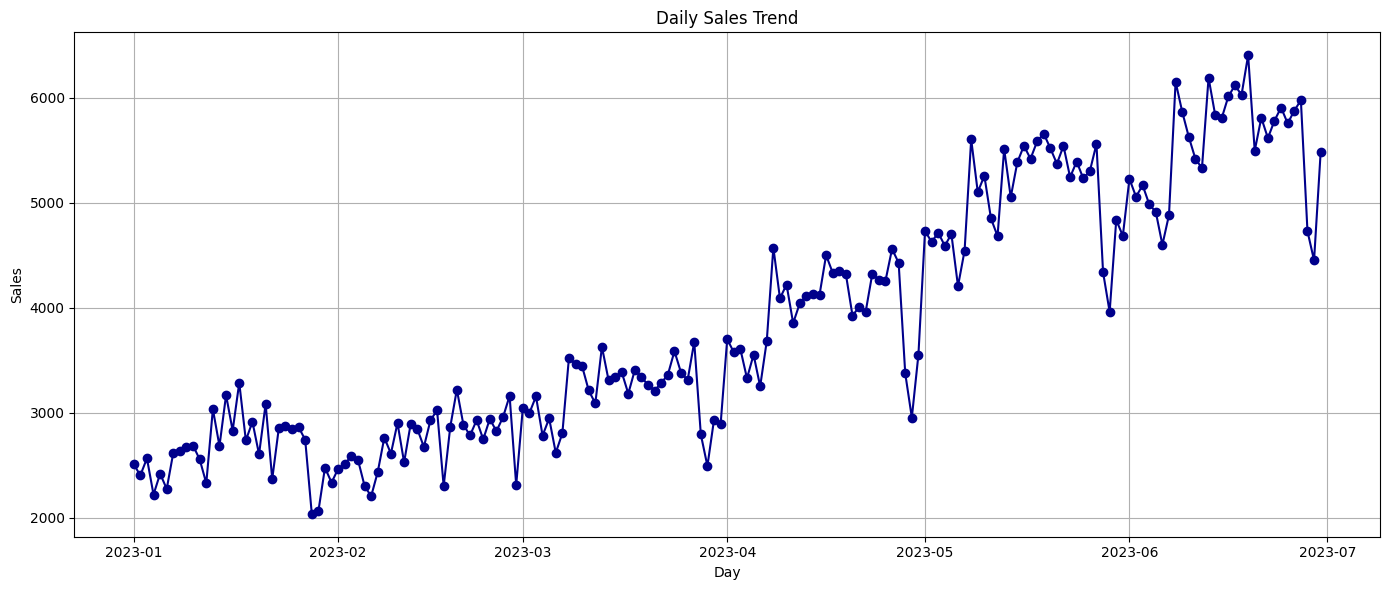

    transaction_date    sales
0         2023-01-01  2508.20
1         2023-01-02  2403.35
2         2023-01-03  2565.00
3         2023-01-04  2220.10
4         2023-01-05  2418.85
..               ...      ...
176       2023-06-26  5875.90
177       2023-06-27  5975.65
178       2023-06-28  4728.90
179       2023-06-29  4450.75
180       2023-06-30  5481.32

[181 rows x 2 columns]


In [16]:
daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(daily_sales['transaction_date'],daily_sales['sales'], marker='o', color='darkblue')


ax.set_title('Daily Sales Trend')
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.grid(True)
plt.xticks()
plt.tight_layout()
plt.show()
print(daily_sales)

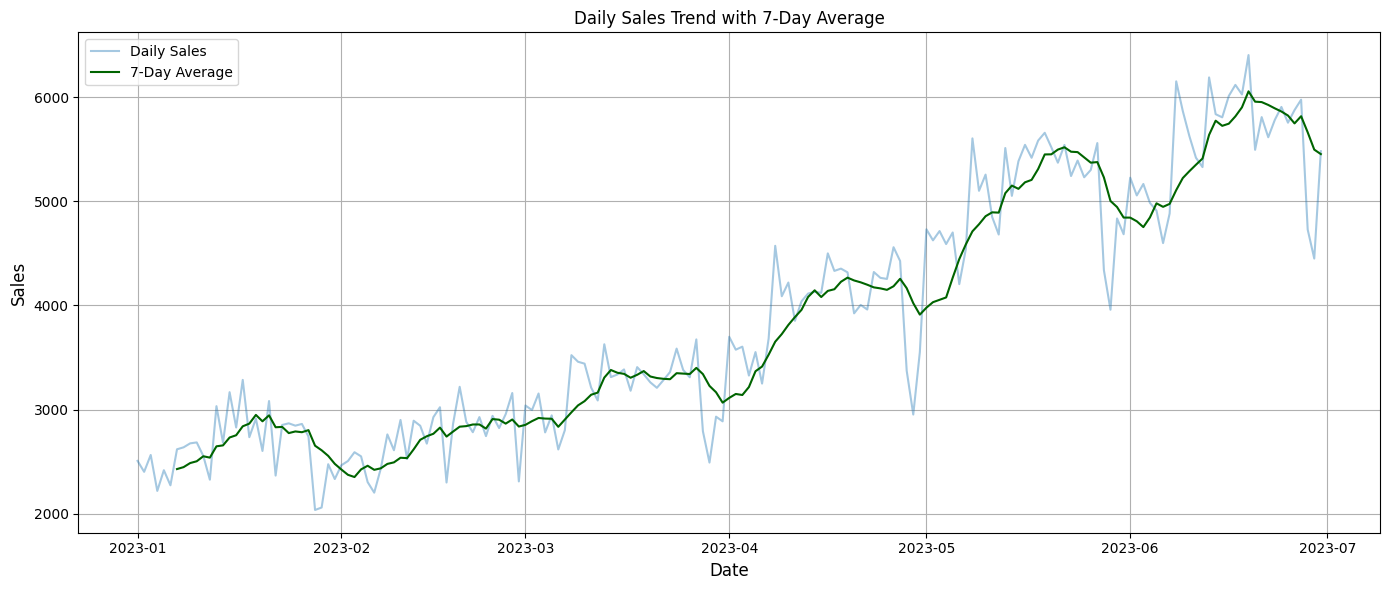

In [17]:
daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

daily_sales['rolling_avg'] = daily_sales['sales'].rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales['transaction_date'], daily_sales['sales'], label='Daily Sales',alpha=0.4 )
plt.plot(daily_sales['transaction_date'], daily_sales['rolling_avg'], label='7-Day Average', color='darkgreen')

plt.title('Daily Sales Trend with 7-Day Average')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Conclusion: Daily Sales Trend
Sales are growing steadily over time, with a few ups and downs along the way. The 7-day average makes it easier to see this overall rise. While some days had dips, the general trend shows that business is picking up and moving in a positive direction.

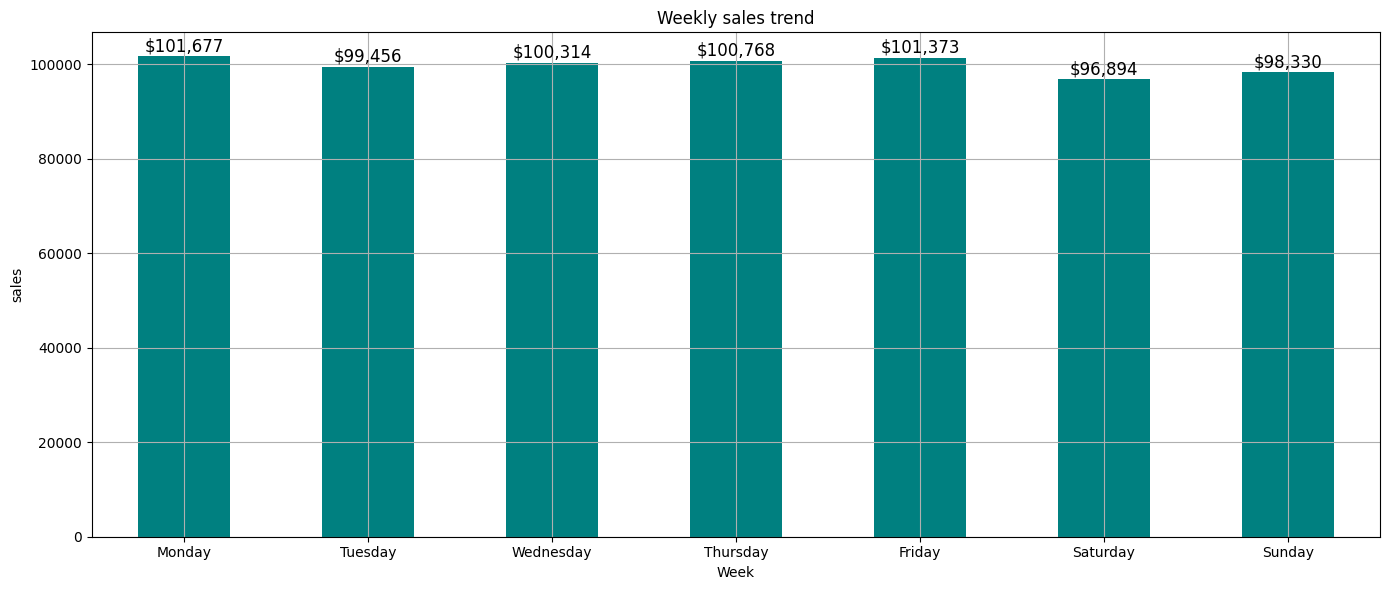

In [18]:
#Weekly Pattern: Busiest Day
df['day_of_week'] = df['transaction_date'].dt.day_name()
weekly_sales = df.groupby('day_of_week')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
fig, ax =plt.subplots(figsize=(14,6))
weekly_sales.plot(kind='bar',ax=ax,color='teal')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+200,
        f'${height:,.0f}',
        ha='center', va='bottom', fontsize=12
    )
ax.set_title('Weekly sales trend')
ax.set_xlabel('Week')
ax.set_ylabel("sales")
ax.grid(True)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

##### Conclusion:
Weekly sales remain strong and consistent with only minor variations. The slight dip in Week 5 could be worth watching, but overall, performance is solid and steady.

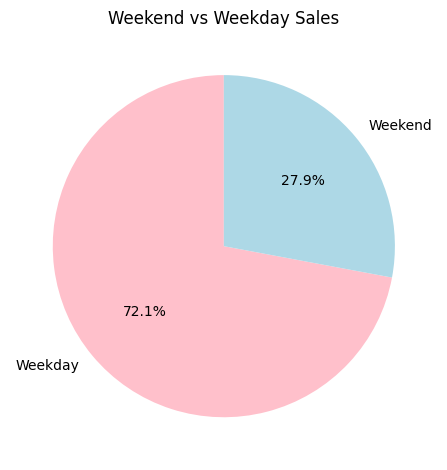

In [19]:
#Weekend vs Weekday
# 1. Add 'day_of_week' column
df['day_of_week'] = df['transaction_date'].dt.day_name()

# 2. Tag each row as 'Weekday' or 'Weekend'
df['day_type'] = df['day_of_week'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# 3. Group by 'day_type' and sum sales
day_type_sales = df.groupby('day_type')['sales'].sum()

# 4. Plot Pie Chart
colors = ['pink', 'lightblue']  # Customize colors if you'd like
day_type_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, ylabel='', title='Weekend vs Weekday Sales')
plt.tight_layout()
plt.show()


##### Conclusion: Weekend vs Weekday Sales
The pie chart shows that 72.1% of total sales occur on weekdays, while only 27.9% happen on weekends.
This suggests that the majority of customer activity and purchasing behavior takes place during the workweek. Contributing to nearly three-quarters of total sales. Focusing promotions or campaigns during the week could boost engagement even further.

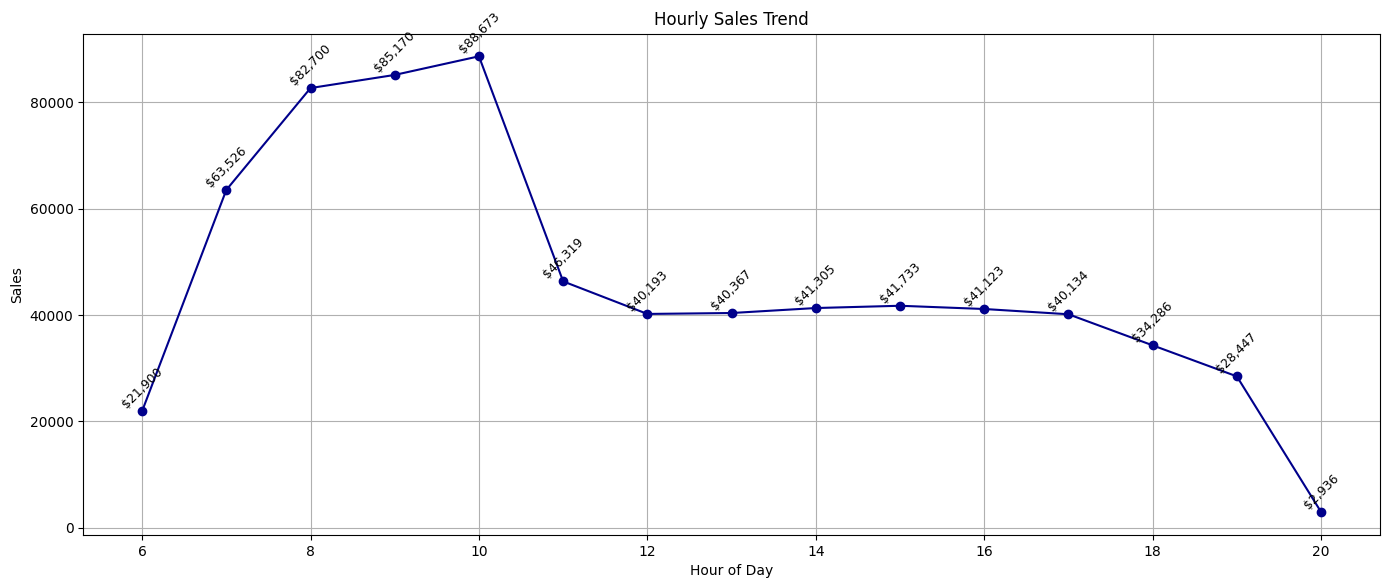

In [20]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

#df['transaction_hour'] = pd.to_datetime(df['transaction_time']).dt.hour
df['transaction_hour'] = df['transaction_time'].apply(lambda x: x.hour)

hourly_sales = df.groupby('transaction_hour')['sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(hourly_sales['transaction_hour'], hourly_sales['sales'], marker='o', color='darkblue')

for i, (x,y) in enumerate(zip(hourly_sales['transaction_hour'], hourly_sales['sales'])):
    ax.annotate(
        f"${y:,.0f}",
        (x,y+150),
        ha = 'center', va='bottom', fontsize=9, rotation=45
    )
ax.set_title("Hourly Sales Trend")  
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Sales')
ax.grid(True)
plt.tight_layout()
plt.show()  


- The time period between 8 AM and 10 AM consistently shows the highest sales activity, suggesting it's the most active shopping window.
- After 10 AM, there is a drop in sales, especially after 11 AM, where it falls to almost half.
- From 12 PM to 5 PM, sales remain steady but relatively moderate.
- A slow decline continues into the evening, reaching the lowest at 8 PM ($4,936).

##### Conclusion: Hourly Sales Trend
The morning hours, especially between 8 to 10 AM, drive the most sales, while evenings see much lower activity. This pattern can help guide staffing, promotions, and inventory planning to match peak customer engagement.**

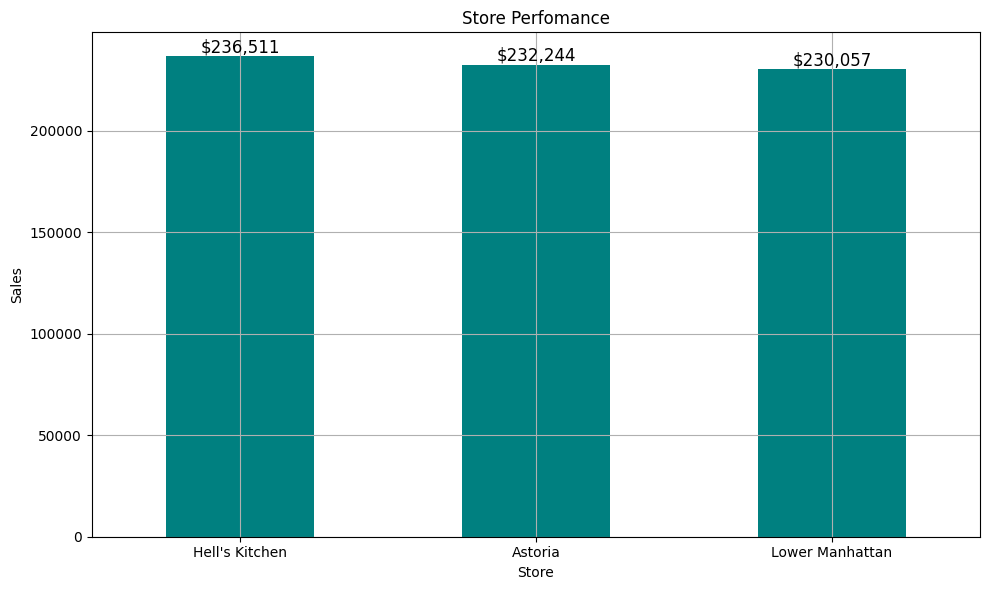

Total Sales by Store Location:
 store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: sales, dtype: float64


In [21]:
#Total Sales by Store Location
store_location_sale= df.groupby('store_location')['sales'].sum().sort_values(ascending=False)

fig,ax=plt.subplots(figsize=(10,6))

store_location_sale.plot(x='store_location', y='sales',kind='bar',ax=ax,color='teal')
for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+100,
        f'${height:,.0f}',
        ha='center', va='bottom', fontsize=12, color='black'
        )
ax.set_title("Store Perfomance")
ax.set_xlabel("Store")
ax.set_ylabel('Sales')
ax.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Total Sales by Store Location:\n", store_location_sale)

With the help of the graph, We can clearly see the Hell's Kitchen generates the most revenue overall ($236,511) anyway, there no much diffrence in all three store sales , but lower manhattan is on lowes but still saleling enough arround $230,057.

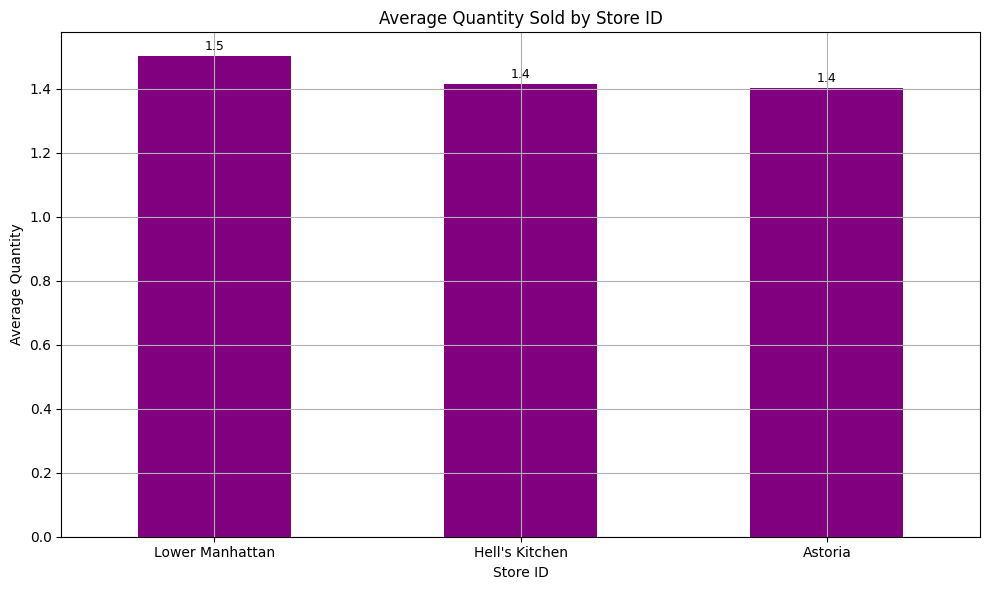

Average Quantity Sold per Store:
 store_location
Lower Manhattan    1.501444
Hell's Kitchen     1.413955
Astoria            1.403012
Name: transaction_qty, dtype: float64


In [22]:

# Calculate sales (for consistency)
df['sales'] = df['transaction_qty'] * df['unit_price']

# Group by store_id and calculate mean quantity
avg_qty_by_store = df.groupby('store_location')['transaction_qty'].mean().sort_values(ascending=False)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
avg_qty_by_store.plot(x='store_location', y='transaction_qty', kind='bar', ax=ax, color='purple')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height + 0.01, 
            f'{height:.1f}', 
            ha='center', va='bottom', fontsize=9)

# Styling
ax.set_title('Average Quantity Sold by Store ID')
ax.set_xlabel('Store ID')
ax.set_ylabel('Average Quantity')
ax.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print results
print("Average Quantity Sold per Store:\n", avg_qty_by_store)

##### Conclusion: Average Quantity Sold per Store
We can clearly see Lower Manhattan is on top with an average of 1.501444 items per transaction, but in sales - store comparison chart we can see that this store is not making enough sales.

In [23]:
#Which Store Sells the Most per Transaction? Mean?
#This question is asking to figure out which store, among all the stores in dataset, 
# makes the highest average amount of money from each individual transaction. 
#Transaction: A single purchase or sale event, recorded in our data with details like transaction_id, 
# transaction_qty, unit_price, etc.
#Per Transaction: This means we’re looking at the average sales value for each unique transaction, 
# not the total sales across all transactions.
#Sells the Most: The store with the highest average sales per transaction is considered the "best" 
# in this context, indicating it might have higher-priced items, larger basket sizes 
# (more items per purchase), or more expensive products.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16020\1515551465.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_sales_per_txn = df.groupby('store_location').apply(lambda x: x['sales'].sum() / x['transaction_id'].nunique()).sort_values(ascending=False)


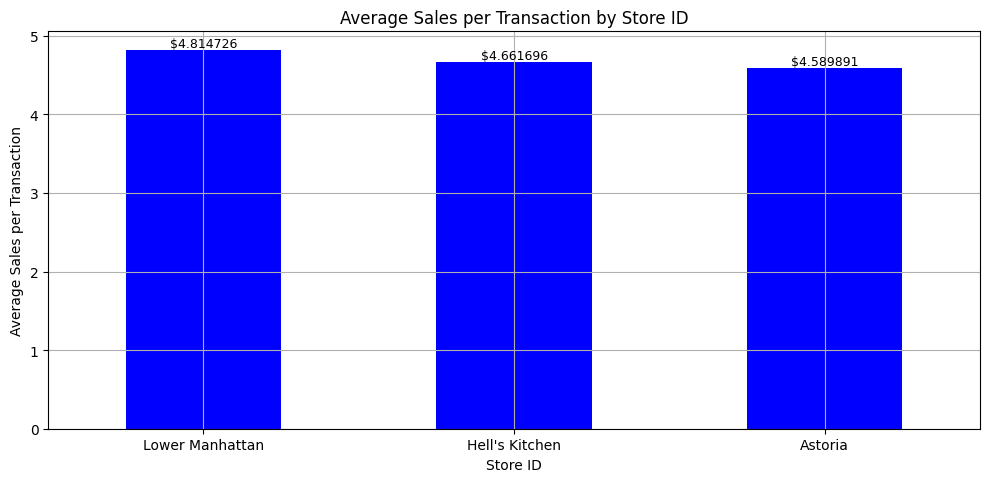

Average Sales per Transaction per Store:
 store_location
Lower Manhattan    4.814726
Hell's Kitchen     4.661696
Astoria            4.589891
dtype: float64


In [24]:
#Which Store Sells the Most per Transaction?
# Calculate sales
df['sales'] = df['transaction_qty'] * df['unit_price']

# Group by store_id and calculate average sales per transaction using lambda
avg_sales_per_txn = df.groupby('store_location').apply(lambda x: x['sales'].sum() / x['transaction_id'].nunique()).sort_values(ascending=False)

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
avg_sales_per_txn.plot(x='store_location', y='avg_sales_per_txn', kind='bar', ax=ax, color='blue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
            height + .001, 
            f'${height:,f}', 
            ha='center', va='bottom', fontsize=9)

# Styling
ax.set_title('Average Sales per Transaction by Store ID')
ax.set_xlabel('Store ID')
ax.set_ylabel('Average Sales per Transaction')
ax.grid(True)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

# Print results
print("Average Sales per Transaction per Store:\n", avg_sales_per_txn)

##### Conclusion: Store Sells the Most per Transaction
Lower Manhattan truly shines here with an average of $4.814726 per transaction, proving it’s the go-to spot for those special coffee moments.

In [33]:
df['product_category'].unique()


array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [34]:
df['product_category'].nunique()

9

In [30]:
df['product_type'].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [35]:
df['product_type'].nunique()

29

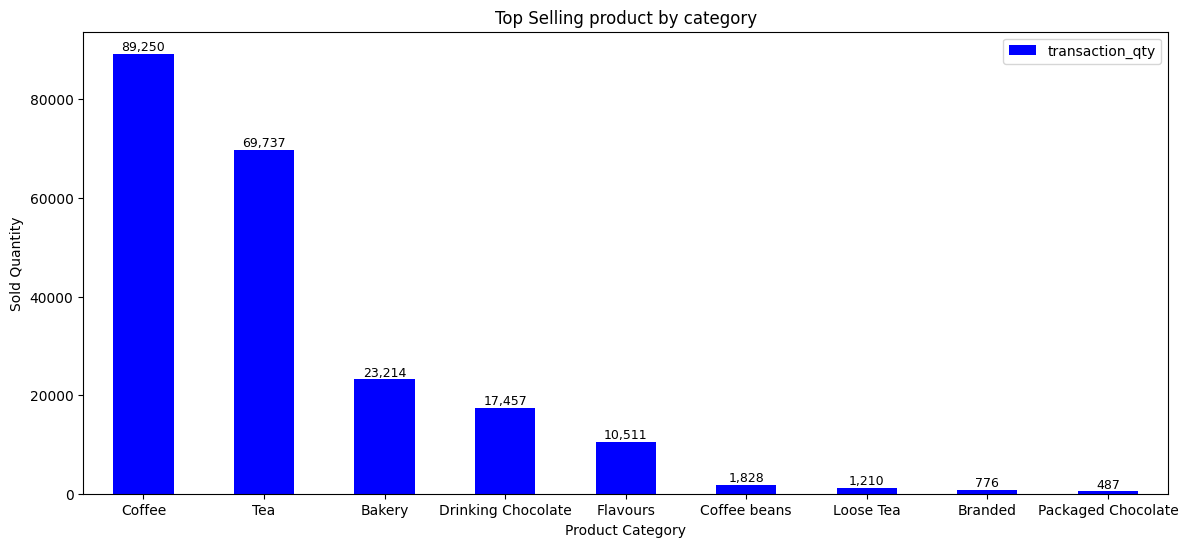

In [ ]:
# Top product categories by quantity
top_categories_qty = df.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False).reset_index()

fig,ax=plt.subplots(figsize=(14,6))
top_categories_qty.plot(x='product_category', y='transaction_qty', kind='bar', ax=ax, color='blue')

for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+10,
        f'{height:,.0f}',
        ha='center', va='bottom', fontsize=9
    )
ax.set_title('Top Selling product by category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Sold Quantity')
plt.xticks(rotation=0)
plt.tight_layout
plt.show()


coffee category is leading 

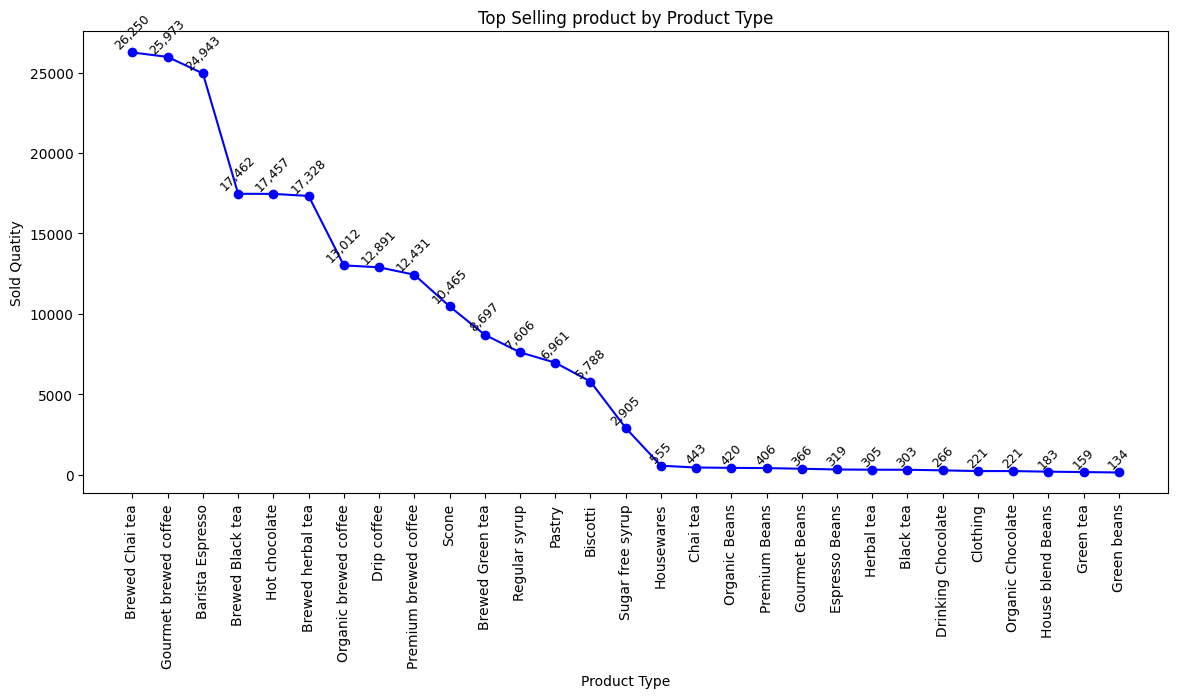

In [51]:
# Top product types by quantity
top_types_qty = df.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False).reset_index()

fig,ax=plt.subplots(figsize=(14,6))
ax.plot(top_types_qty['product_type'],top_types_qty['transaction_qty'], marker='o', color='blue')

for i,(x,y) in enumerate(zip(top_types_qty['product_type'],top_types_qty['transaction_qty'])):
    ax.annotate(
        f'{y:,.0f}',
        (x,y+50),
        ha='center', va='bottom', fontsize=9, rotation = 45
    )
ax.set_title('Top Selling product by Product Type')
ax.set_xlabel('Product Type')
ax.set_ylabel('Sold Quatity')
plt.tight_layout
plt.xticks(rotation=90)
plt.show()

Brewed chai tea is leading , which comes under coffee category 